# Wave project

## Mathematical model

In this project, we were studying the 2-dimentional Wave Equation with damping on the form
\\[ \frac{\partial^2 u}{∂ t^2} + b\frac{∂ u}{∂ t} = \frac{∂}{∂ x}\left(q(x,y) \frac{∂ u}{∂ x}\right) + \frac{∂}{∂ y}\left(q(x,y) \frac{∂ u}{∂ y}\right) + f(x,y,t) \\]

in a rectangular spatial domain $$ \Omega = [0, L_x] \times [0, Ly] $$ 
with homogenous Neumann boundary conditions $$\frac{∂u}{∂n} = u = 0$$
and with initial conditions given by $$u_t(x, y, 0) = V(x, y)$$

## Discretization

The point of discretizing our equation is to be able to approximate it numerically. We will do so such that we have $x_{end} = Nx + 1$ points in the x direction and $y_{end} = Ny + 1$ points in the y direction and $N_t$ in the time-domain.

For simplicity, I will use the notation $u(x_i, y_j, t_n) = u_{i,j}^n$. Where the steps $x_i, y_j, t_n = i\Delta x, j\Delta y, n \Delta t$.

## Verification
### Constant Solution

For the constant solution $u(x,y,t) = U$ our equation reduces to $f(x,y,z) = 0$. This means that 
$$
u_x = u_y = u_t = u_{tt} = 0 \\
$$
and that the initial conditions becomes
$$
u(x, y, 0) = I(x, y) = U \\
u_t(x, y, 0) = V(x, y) = 0 \\
$$
Further, for the purpose of simplicity, we will set $q(x,y) = 1$ and no damping, so $b = 0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Wave2DSolver import *
%matplotlib inline

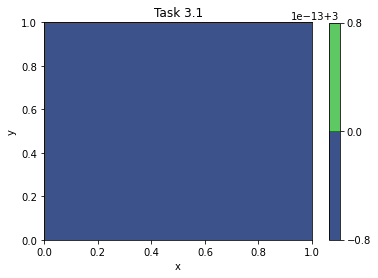

<Figure size 432x288 with 0 Axes>

In [2]:
# Task 3.1
U = 3

I = lambda x, y:    U
V = lambda x, y:    0.
f = lambda x, y, t: 0.
q = lambda x, y:    1

params = {
    "b"  : 0.,
    "Nx" : 100,
    "Ny" : 100,
    "Lx" : 1.,
    "Ly" : 1.,
    "T"  : 1,
    
    "U" : U,
    "I" : I,
    "V" : V,
    "f" : f,
    "q" : q
}
params["beta"] = 0.9 # Making sure the stability criterion is fulfilled

solver31 = Wave2DSolver(params)
solver31.solve
solver31.plot_name = "Task 3.1"
solver31.contour_plot

### Standing waves

$$
\Delta t = \beta \frac{1}{\sqrt{\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2} + \frac{1}{c}}}  \\
$$
where $c = \sqrt{\max{q(x,y)}}$. We have the standing wave solution given by $$ u_e = A \cos{k_x x} \, \cos{k_y y} \, \cos{\omega t}$$ with $$ k_x = \frac{m_x\pi}{L_x}, \quad k_y = \frac{m_y\pi}{L_y}\\ $$ where $m_x=m_y=1$.
Adding our initial condition $I(x, y)$, we get $$ u(x, y, 0) =  A \cos{k_x x} \, \cos{k_y y} $$ and $$ V(x,y)=u_t(x,y,0)=0.\\ $$ To now obtain $\omega$, we look at the equation for a standing undaped wave $$\frac{∂^2u}{∂t^2} = q \nabla^2 u.\\ $$ Now for $u_e = u$, inserting in the above equation, we get
$$
\begin{align*}
\frac{∂^2u_e}{∂x^2} &= k_x^2 u_e \\
\frac{∂^2u_e}{∂x^2} &= k_x^2 u_e \\
\end{align*}
$$
Then we have $\omega^2 = q(k_x^2 + k_y^2).$

We are also going to compute the error $E$ given by
$$
E = || e_{i,j}^{n_t} ||_{L^\infty} \max_{i} \max_{y} \max_{n} |e_{i,j}^{n_t}|
$$ where $L^{\infty}$ is the $L^{\infty}$-norm

and the convergence-rate $r$

$$
r = \frac{\log_{10}{\frac{E_{i+1}}{E_i}}}{\log_{10}{\frac{h_{i+1}}{h_i}}}
$$

hvere $h$ is the stepsize.

error1: 0.10966401913786317 error2 2.760559286198321e-05 analytical [[-0.50843667 -0.50818069 -0.50741302 ...  0.50741302  0.50818069
   0.50843667]
 [-0.50818069 -0.50792484 -0.50715756 ...  0.50715756  0.50792484
   0.50818069]
 [-0.50741302 -0.50715756 -0.50639143 ...  0.50639143  0.50715756
   0.50741302]
 ...
 [ 0.50741302  0.50715756  0.50639143 ... -0.50639143 -0.50715756
  -0.50741302]
 [ 0.50818069  0.50792484  0.50715756 ... -0.50715756 -0.50792484
  -0.50818069]
 [ 0.50843667  0.50818069  0.50741302 ... -0.50741302 -0.50818069
  -0.50843667]]
[[ 0.         -0.6177895  -0.61747847 ...  0.61747847  0.6177895
   0.        ]
 [-0.6177895  -0.61810069 -0.6177895  ...  0.6177895   0.61810069
   0.6177895 ]
 [-0.61747847 -0.6177895  -0.61747847 ...  0.61747847  0.6177895
   0.61747847]
 ...
 [ 0.61747847  0.6177895   0.61747847 ... -0.61747847 -0.6177895
  -0.61747847]
 [ 0.6177895   0.61810069  0.6177895  ... -0.6177895  -0.61810069
  -0.6177895 ]
 [ 0.          0.6177895   0.6174

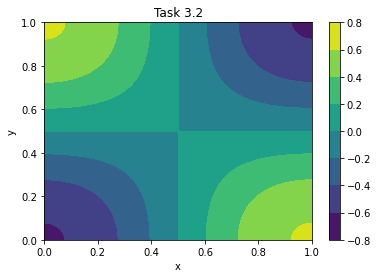

<Figure size 432x288 with 0 Axes>

In [3]:
# Task 3.2

Lx = params["Lx"]
Ly = params["Ly"]

A = 2
mx = 1; kx = (mx*np.pi / Lx)
my = 1; ky = (my*np.pi / Ly)
w = np.sqrt((mx * np.pi / Lx)**2 + (my * np.pi / Ly)**2)

I = lambda x, y: A*np.cos(kx*x)*np.cos(ky*y)
params["I"] = I

def u_exact(x, y, t):
    return A*np.cos(kx*x)*np.cos(ky*y)*np.cos(w*t)



solver32 = Wave2DSolver(params)

solver32.solve
error1, error2, analytical_solution = solver32.error(u_exact)
solver32.plot_name = "Task 3.2"
solver32.contour_plot

print("error1:" , error1, "error2", error2, "analytical", analytical_solution)

print(solver32.u)

err:  2.0804339887498955
2 1.0 0.6363961030678927 2.0804339887498955 

err:  0.08944134010000168
4 0.3333333333333333 0.21213203435596428 0.08944134010000168 

err:  0.013864710619611031
8 0.14285714285714285 0.09091372900969896 0.013864710619611031 

err:  0.0030965273903681423
16 0.06666666666666667 0.042426406871192854 0.0030965273903681423 

err:  0.0007058825318841944
32 0.03225806451612903 0.020528906550577184 0.0007058825318841944 

err:  0.00016866229474321592
64 0.015873015873015872 0.010101525445522107 0.00016866229474321592 

err:  4.1695159502253e-05
128 0.007874015748031496 0.005010992937542463 4.1695159502253e-05 

E: 0.08944134010000168 2.0804339887498955
h:  0.3333333333333333 1.0
E: 0.013864710619611031 0.08944134010000168
h:  0.14285714285714285 0.3333333333333333
E: 0.0030965273903681423 0.013864710619611031
h:  0.06666666666666667 0.14285714285714285
E: 0.0007058825318841944 0.0030965273903681423
h:  0.03225806451612903 0.06666666666666667
E: 0.00016866229474321592 

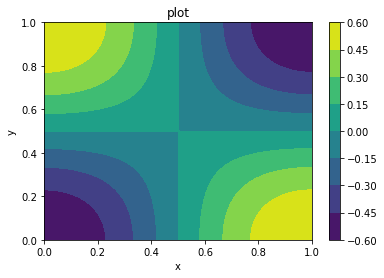

<Figure size 432x288 with 0 Axes>

In [4]:
# Task 3.2

Lx = params["Lx"]
Ly = params["Ly"]

A = 2
mx = 1; kx = (mx*np.pi / Lx)
my = 1; ky = (my*np.pi / Ly)
w = np.sqrt((mx * np.pi / Lx)**2 + (my * np.pi / Ly)**2)

I = lambda x, y: A*np.cos(kx*x)*np.cos(ky*y)
params["I"] = I

def u_exact(x, y, t):
    return A*np.cos(kx*x)*np.cos(ky*y)*np.cos(w*t)

E = list(); N = list()
h = list(); r = list()
start = 1; end = 8; num = end - start
    
for n in range(1, end):
    N.append(2**n)

for n in N:
    
    params["Nx"] = n; params["Ny"] = n
    
    solver32 = Wave2DSolver(params)
    solver32.solve
    error, analytical_solution = solver32.error2(u_exact)
    print("err: ", error)
    E.append(error)
    h.append(solver32.dx)
    # h.append(solver32.dt)
    print(n, solver32.dx, solver32.dt, error, "\n")

    if n == N[-1]:
        solver32.contour_plot

for i in range(num-1):
    print("E:", E[i+1], E[i])
    print("h: ", h[i+1], h[i])
    r.append( (np.log(E[i+1]/E[i]))/ (np.log(h[i+1]/h[i])))

print("Convergence rate: ", r)

The convergence rate is expected to be $r = 2.0$. We see that we do get an approximate value of this

### Damped waves

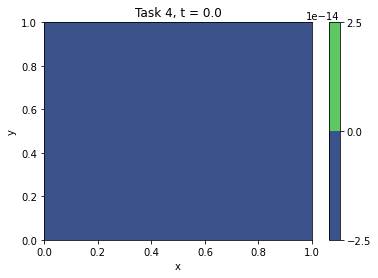

<Figure size 432x288 with 0 Axes>

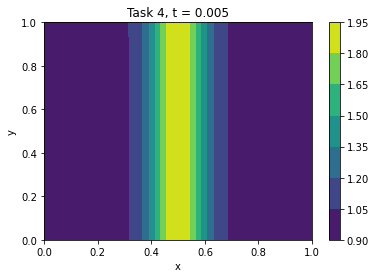

<Figure size 432x288 with 0 Axes>

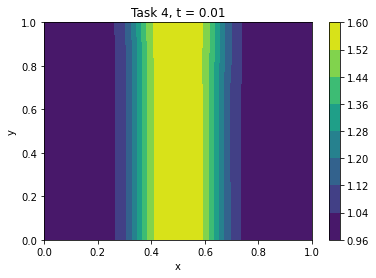

<Figure size 432x288 with 0 Axes>

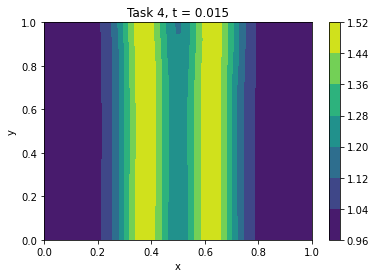

<Figure size 432x288 with 0 Axes>

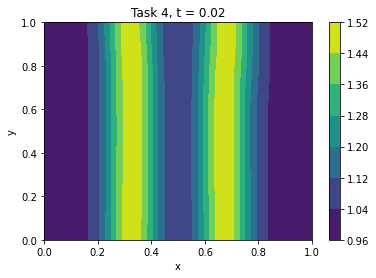

<Figure size 432x288 with 0 Axes>

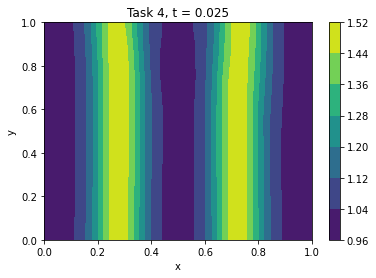

<Figure size 432x288 with 0 Axes>

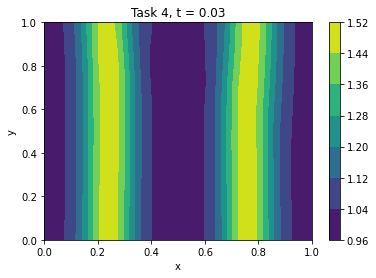

<Figure size 432x288 with 0 Axes>

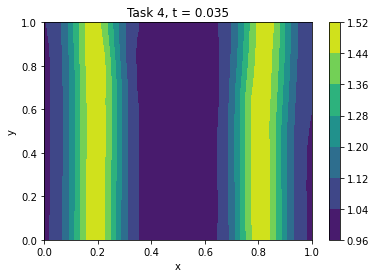

<Figure size 432x288 with 0 Axes>

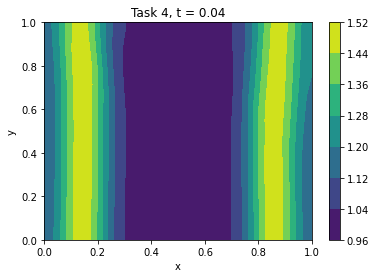

<Figure size 432x288 with 0 Axes>

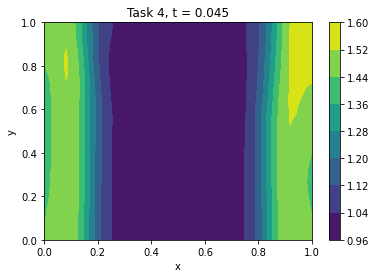

<Figure size 432x288 with 0 Axes>

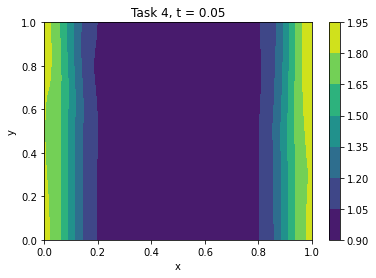

<Figure size 432x288 with 0 Axes>

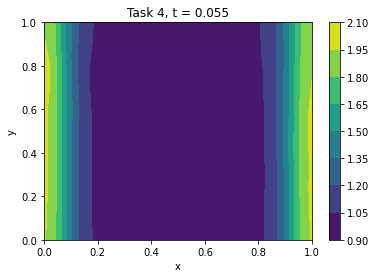

<Figure size 432x288 with 0 Axes>

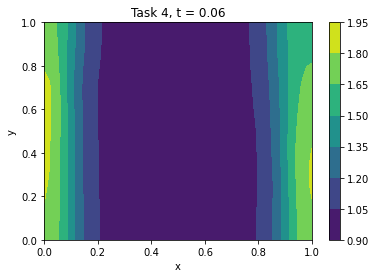

<Figure size 432x288 with 0 Axes>

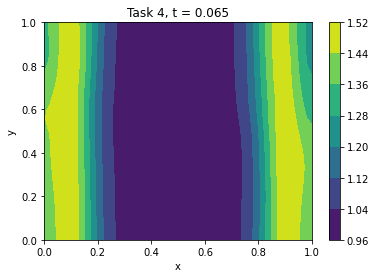

<Figure size 432x288 with 0 Axes>

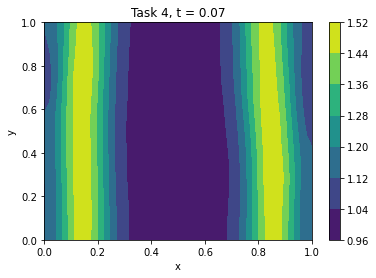

<Figure size 432x288 with 0 Axes>

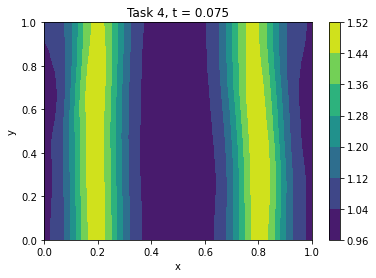

<Figure size 432x288 with 0 Axes>

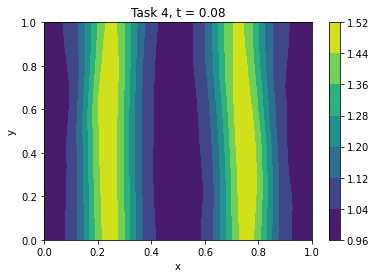

<Figure size 432x288 with 0 Axes>

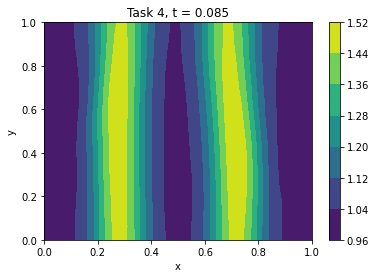

<Figure size 432x288 with 0 Axes>

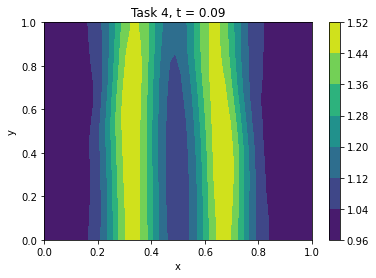

<Figure size 432x288 with 0 Axes>

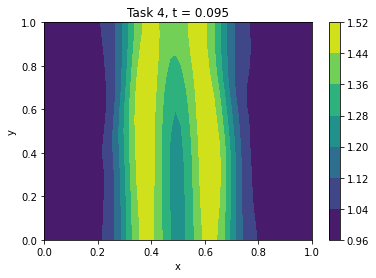

<Figure size 432x288 with 0 Axes>

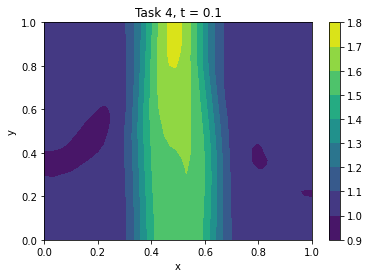

<Figure size 432x288 with 0 Axes>

In [5]:
# Task 4
params["b"]  = 1
params["Lx"] = 1;  params["Ly"] = 1
params["Nx"] = 50; params["Ny"] = 50
params["T"]  = 1

def I(x, y, I0 = 1, Ia = 1, Im = 0.5, Is = 0.1):
    return I0 + Ia*np.exp(-((x-Im)/Is)**2)

#def V(x, y):
#    return 0

def f(x, y, t):
    return 0

def q_(x, y, g = 9.81, H0 = 10):
    return g*(H0 - B(x,y))

### 
b = params["b"]

def B(x, y, B0 = 0, Ba = 1, Bmx = 0.5, Bmy = 0.5, Bs = 1):
    if 0 <= np.sqrt(x**2 + y**2) <= Bs:
        return B0 + Ba * np.exp(-(((x-Bmx)/Bs)**2 + ((y-Bmy)/(b * Bs))**2))
    else:
        return B0
    
params["I"] = I  # I(x,y, I0, Ia, Im, Is)
params["f"] = f  # f(x, y, z)
params["q"] = q_ # q_(x,y, g, H0)

time_domain = [0.005*i for i in range(21)]
    
for t in time_domain:
    params["T"] = t 
    solver = Wave2DSolver(params)
    solver.solve
    solver.plot_name = f"Task 4, t = {t}"
    solver.contour_plot
    plt.show()

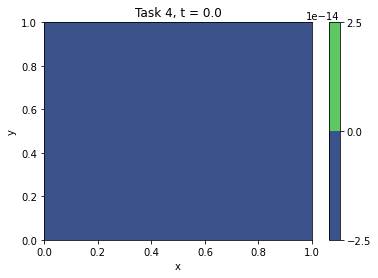

<Figure size 432x288 with 0 Axes>

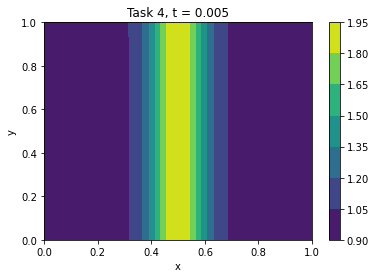

<Figure size 432x288 with 0 Axes>

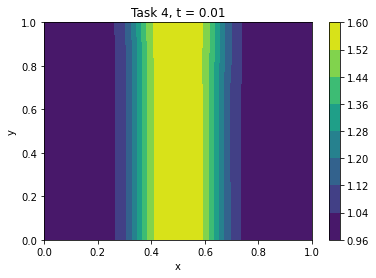

<Figure size 432x288 with 0 Axes>

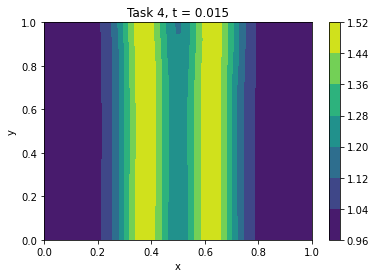

<Figure size 432x288 with 0 Axes>

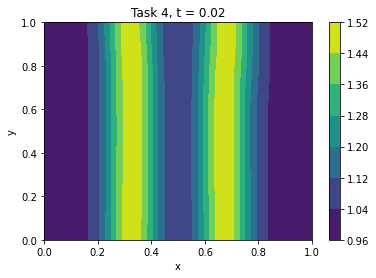

<Figure size 432x288 with 0 Axes>

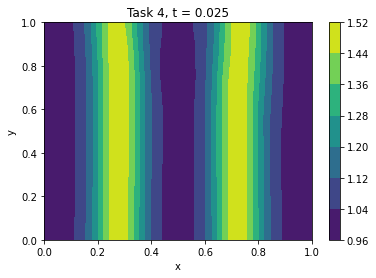

<Figure size 432x288 with 0 Axes>

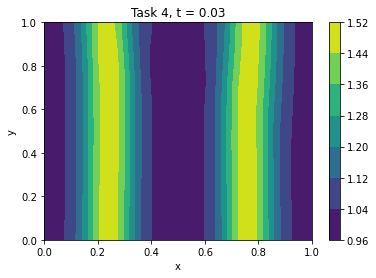

<Figure size 432x288 with 0 Axes>

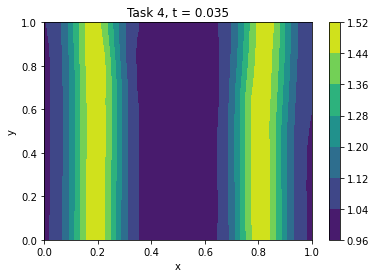

<Figure size 432x288 with 0 Axes>

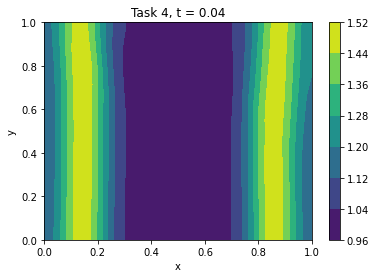

<Figure size 432x288 with 0 Axes>

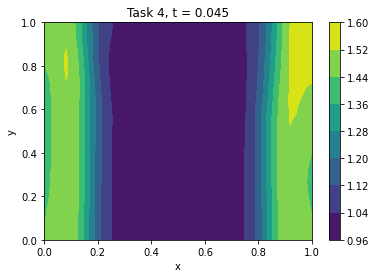

<Figure size 432x288 with 0 Axes>

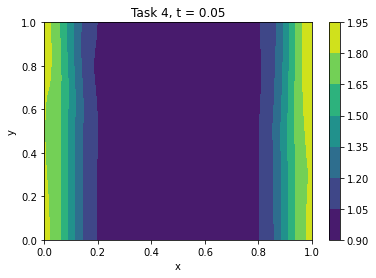

<Figure size 432x288 with 0 Axes>

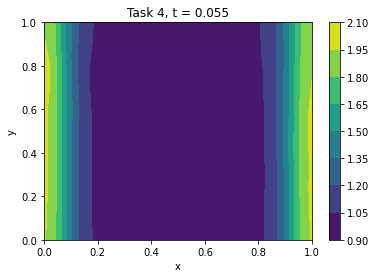

<Figure size 432x288 with 0 Axes>

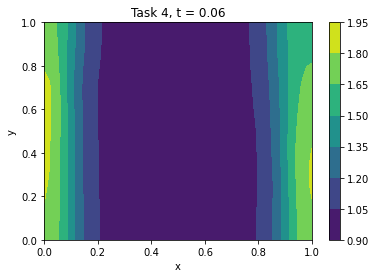

<Figure size 432x288 with 0 Axes>

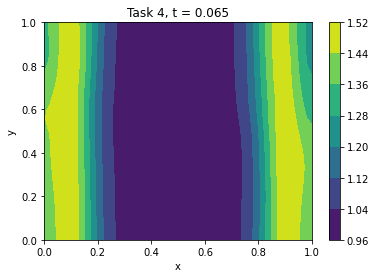

<Figure size 432x288 with 0 Axes>

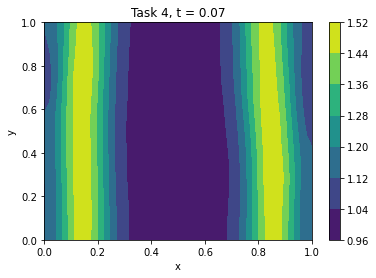

<Figure size 432x288 with 0 Axes>

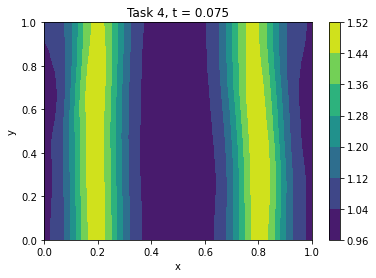

<Figure size 432x288 with 0 Axes>

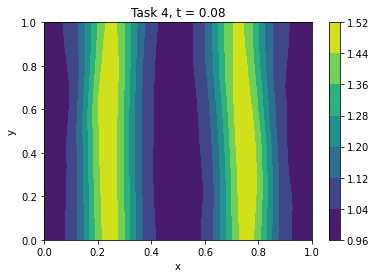

<Figure size 432x288 with 0 Axes>

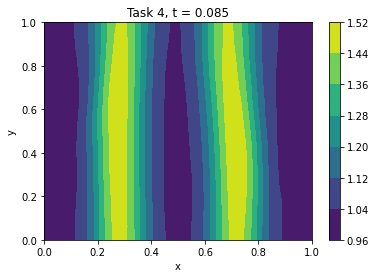

<Figure size 432x288 with 0 Axes>

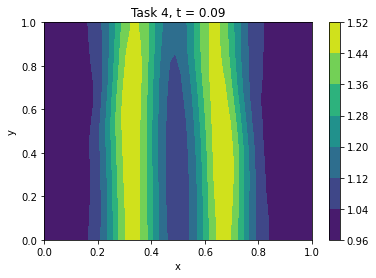

<Figure size 432x288 with 0 Axes>

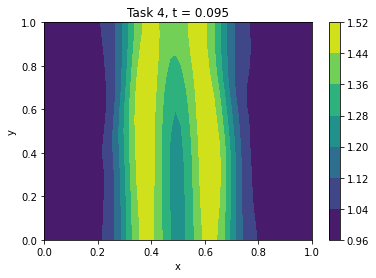

<Figure size 432x288 with 0 Axes>

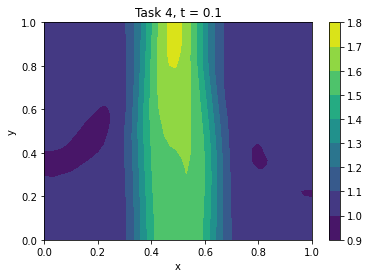

<Figure size 432x288 with 0 Axes>

In [6]:
def Gaussian_2d(x, y, B0 = 0, Ba = 1, Bmx = 0.5, Bmy = 0.5, Bs = 1):
    if 0 <= np.sqrt(x**2 + y**2) <= Bs:
        return B0 + Ba*np.exp(-(((x - Bmx) / Bs)**2 + ((y - Bmy) / (b*Bs))**2))
    else:
        return B0

def cos_hat(x, y, B0 = 0, Ba = 1, Bmx = 0.5, Bmy = 0.5, Bs = 1):
    if 0 <= np.sqrt(x**2 + y**2) <= Bs:
        return B0 + Ba*np.cos(np.pi*(x - Bmx) / 2*Bs)*np.cos(np.pi*(y - Bmy) / 2*Bs)
    else:
        return B0

def q_func(x, y, g = 9.81, H0 = 10, hill = "Gaussian_2d"):
    return g*(H0 - B_func(x,y, hill))

def B_func(x,y, hill = "Gaussian_2d"):
    if hill == "Gaussian_2d":
        return Gaussian_2d(x, y)

    elif hill == "cos_hat":
        return cos_hat(x, y)

params["I"] = I  # I(x,y, I0, Ia, Im, Is)
params["f"] = f  # f(x, y, z)
params["q"] = q_ # q_(x,y, g, H0)

time_domain = [0.005*i for i in range(21)]

for t in time_domain:
    params["T"] = t
    solver = Wave2DSolver(params)
    solver.solve
    solver.plot_name = f"Task 4, t = {t}"
    solver.contour_plot
    plt.show()